In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#2): Which is digit '4'


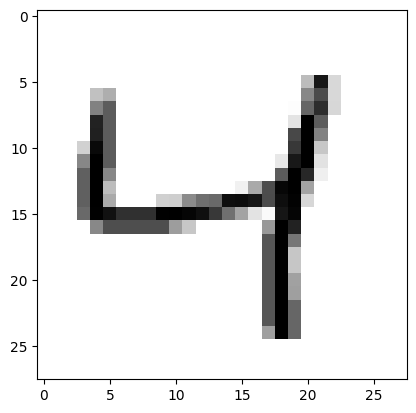

In [ ]:
digit = 2
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

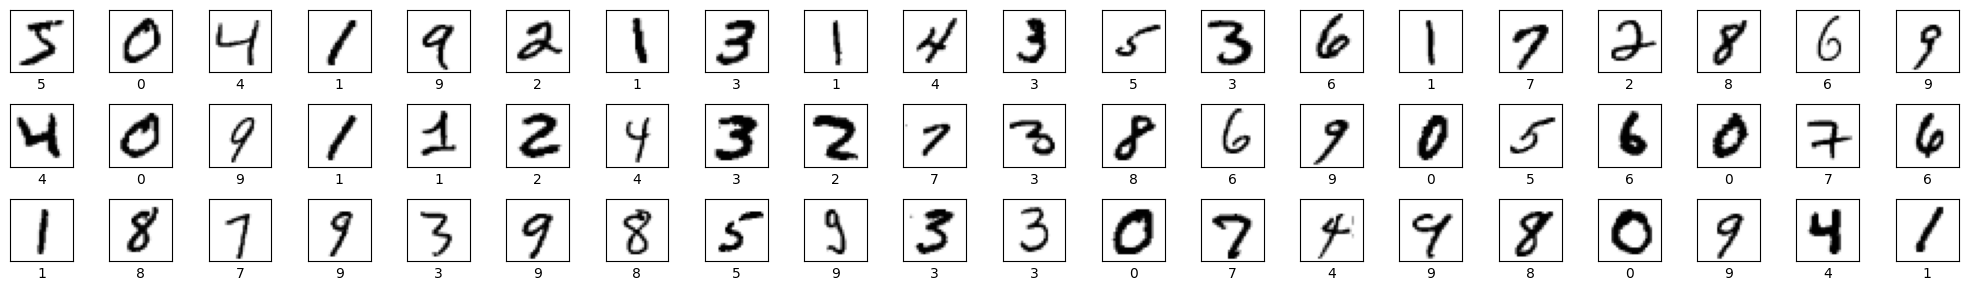

In [ ]:
ROWS = 3
COLS = 20
i = 0
plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#2): Which is digit '4'


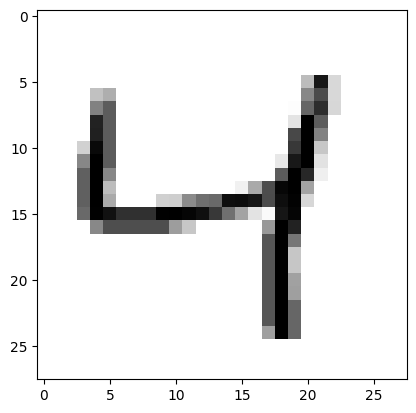

In [ ]:
digit = 2
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9158 - loss: 0.2870 - val_accuracy: 0.9514 - val_loss: 0.1646
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9668 - loss: 0.1088 - val_accuracy: 0.9651 - val_loss: 0.1231
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9782 - loss: 0.0688 - val_accuracy: 0.9696 - val_loss: 0.1072
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9827 - loss: 0.0528 - val_accuracy: 0.9609 - val_loss: 0.1547
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9878 - loss: 0.0386 - val_accuracy: 0.9703 - val_loss: 0.1108
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9900 - loss: 0.0319 - val_accuracy: 0.9671 - val_loss: 0.1297
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9905 - loss: 0.0292 - val_accuracy: 0.9722 - val_loss: 0.1154
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9929 - loss: 0.0213 - val_accuracy: 0.

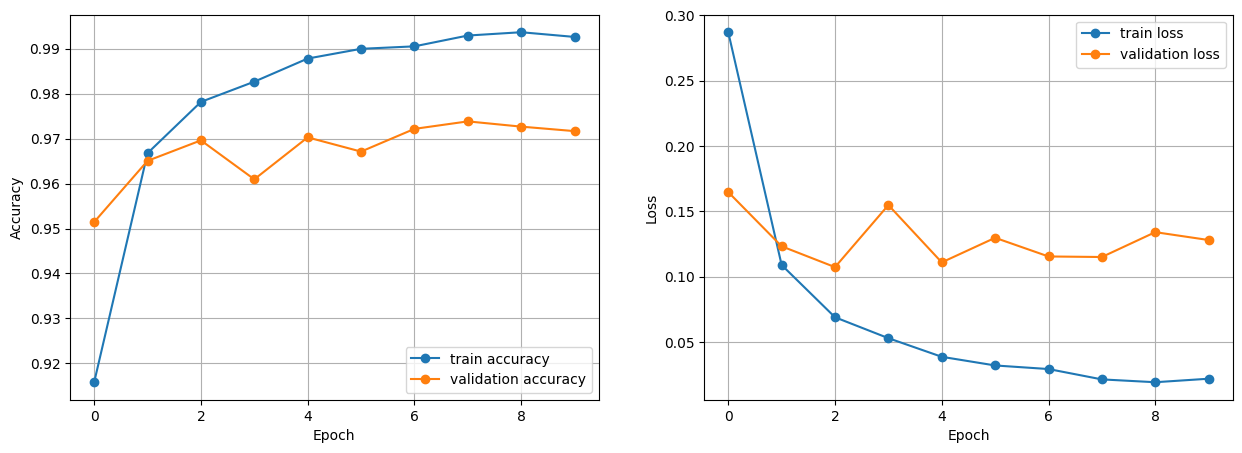

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9758 - loss: 0.0976

Test accuracy: 0.9757999777793884


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


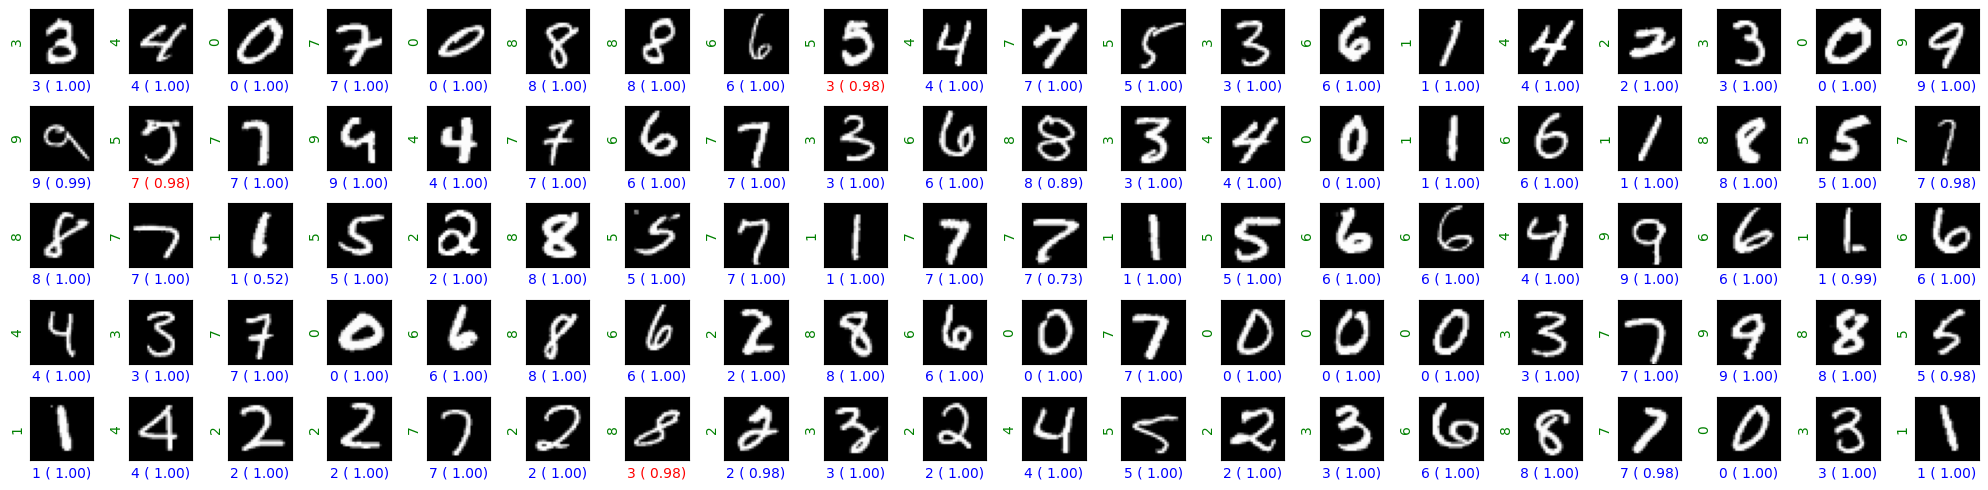

In [ ]:
predictions = model.predict(x_test)
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


c:\Users\HP\tf_env\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 784))',)
  warnings.warn(msg)


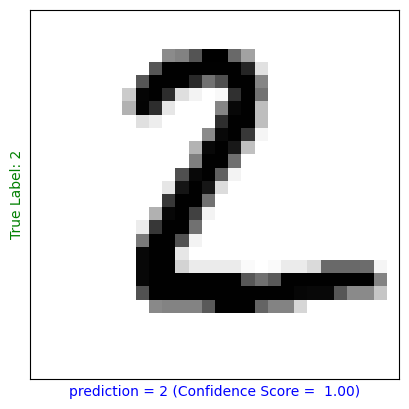

In [ ]:
test(1)

In [ ]:
model.save("my_model.h5")